In [27]:
import pprint

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


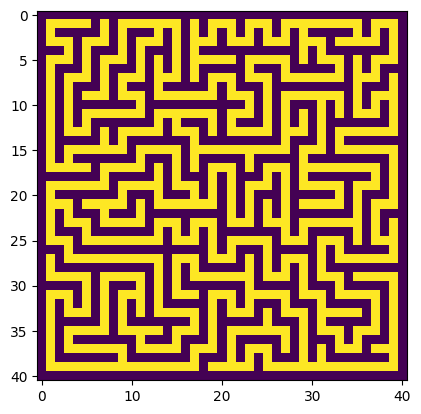

In [108]:
import maze

size = 20
m = maze.Maze(size)

# issues
# fine for checking connection between two specific nodes
# but cannot find all connections for a particular node

# solutions
# store bidirectional data

# tests
# all edge connections are one away from each other
# each connection is listed only once

grid_size = (size * 2) + 1
grid = [[False for _ in range(grid_size)] for _ in range(grid_size)]
for gy in range(grid_size):
    for gx in range(grid_size):
        on_y = gy % 2 == 1
        on_x = gx % 2 == 1
        edge_y = gy == 0 or gy == (grid_size - 1)
        edge_x = gx == 0 or gx == (grid_size - 1)

        if on_x and on_y:
            grid[gy][gx] = True
        elif not (edge_y or edge_x):
            if on_x:
                x = gx // 2
                y1 = (gy - 1) // 2
                y2 = (gy + 1) // 2
                grid[gy][gx] = (y1, x) in m.edges[(y2, x)]
            elif on_y:
                y = gy // 2
                x1 = (gx - 1) // 2
                x2 = (gx + 1) // 2
                grid[gy][gx] = (y, x1) in m.edges[(y, x2)]

from matplotlib import pyplot
import matplotlib as mpl

fig, ax = pyplot.subplots()
ax.imshow(grid)